# Ham and Spam E-mail Classifier

# 1. Data Preprocessing

## 1.1. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import median
from numpy import var
from scipy.stats import pearsonr
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,zero_one_loss, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 1.2. DataSet Read
Read data from initial dataset

In [4]:
df = pd.read_csv("spambase/spambase.data", header=None)

In [6]:
y = df[57]

df_np = df.to_numpy()

## 1.3. Dataset Display
### 1.3.1. Histogram of samples distribution

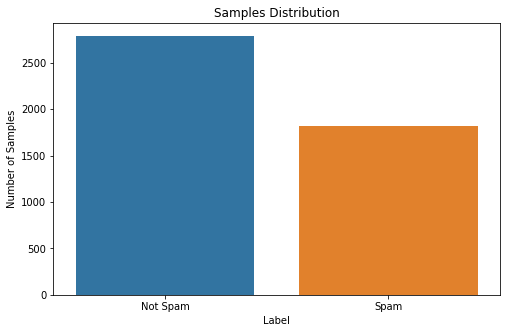

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(y)
plt.xlabel("Label")
ax.set_xticklabels(['Not Spam', 'Spam'])
plt.ylabel("Number of Samples")
plt.title("Samples Distribution")
plt.show()


### 1.3.2. Box plots of features

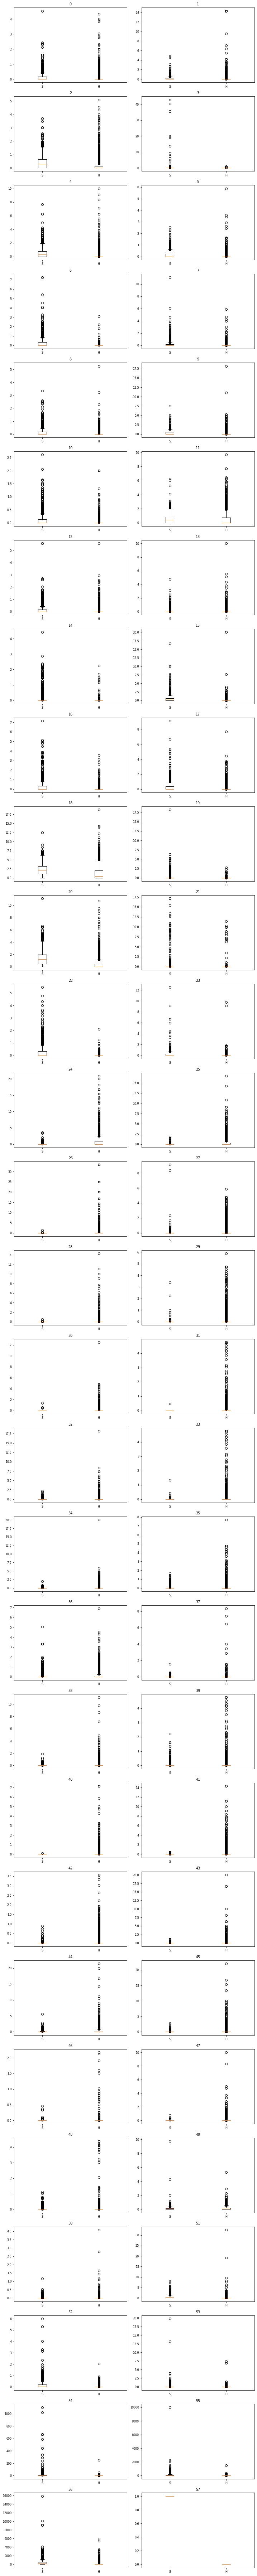

In [8]:
dfS=df[df[57] ==1]
dfH=df[df[57] ==0]
#Creating the window with 10 subplots.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=29, ncols=2, figsize=(10,100))
axes = axes.ravel()
#BOXPLOTS
for idx,ax in enumerate(axes):
    ax.figure
    data_to_plot = [dfS[idx],dfH[idx]]
    ax.boxplot(data_to_plot)
    ax.set_xticklabels(['S', 'H'])
    ax.set_title(idx)
plt.tight_layout()
plt.show()    

### 1.3.3. Histograms for all features

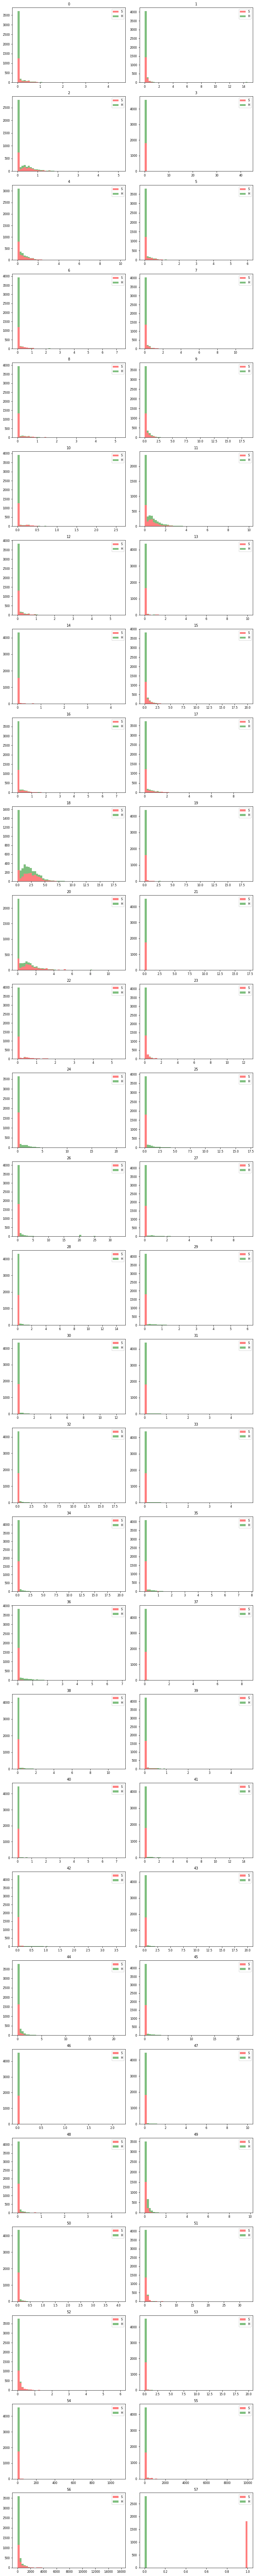

In [9]:
# Separating the data 
dfS=df[df[57] ==1]
dfH=df[df[57] ==0]
#Creating the window with 10 subplots.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=29, ncols=2, figsize=(10,100))
axes = axes.ravel()
#Creating histograms with 50 bins
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[idx]) - min(df[idx]))/50
    ax.hist([dfS[idx],dfH[idx]], bins=np.arange(min(df[idx]), max(df[idx]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['S','H'],color=['r','g']) #remove density=True to remove probs in y axis
    ax.legend(loc='upper right')
    ax.set_title(idx)
plt.tight_layout()
plt.show()

### 1.3.4. Scatter matrix of the top 10 features

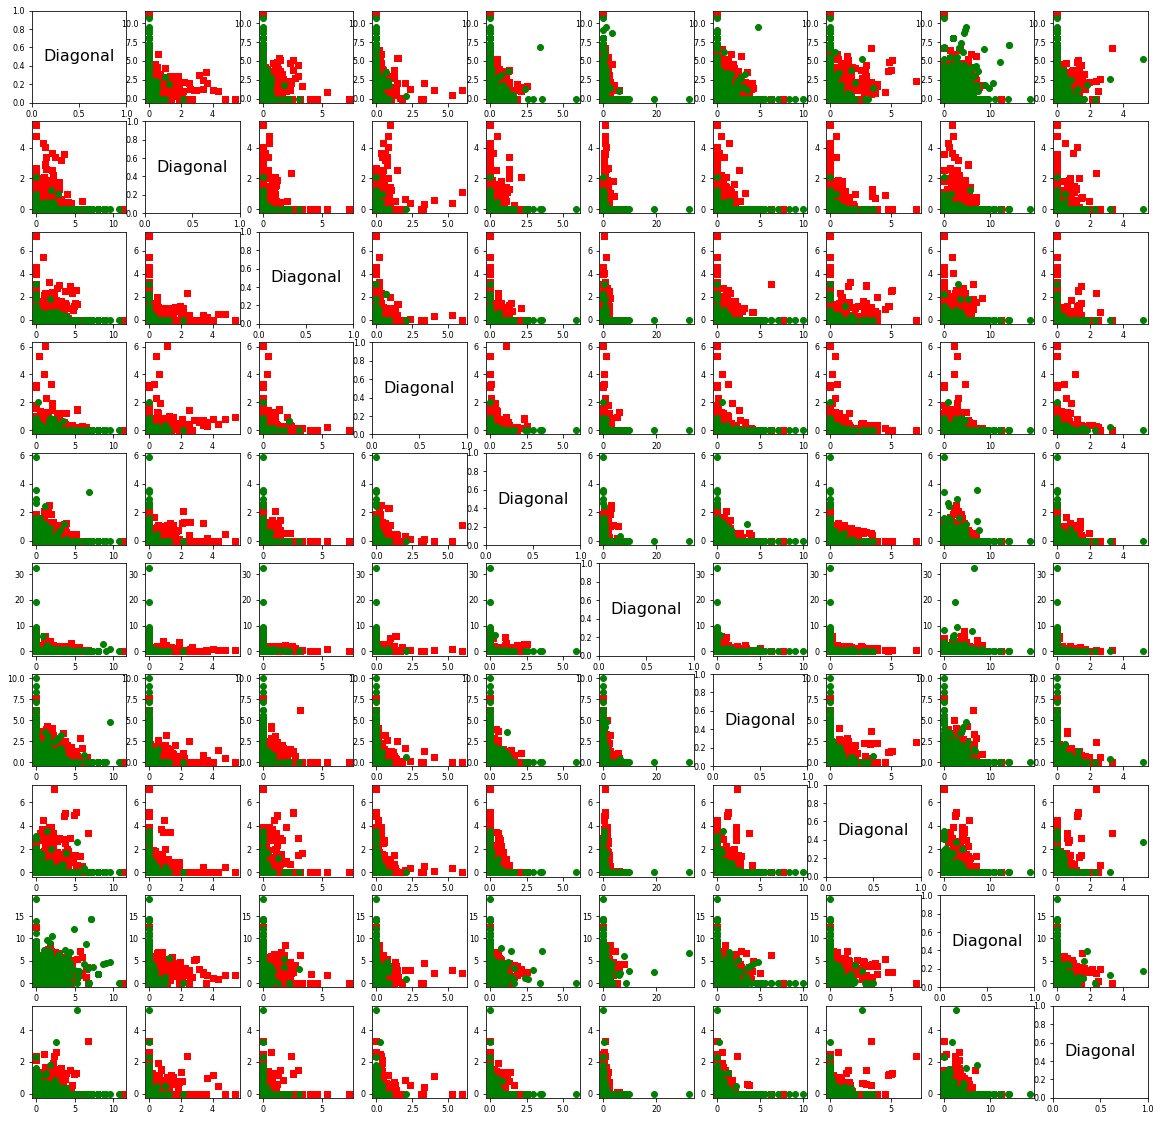

In [11]:
dfS=df[df[57] ==1]
dfH=df[df[57] ==0]
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20,20))

top_10_features = [20, 22, 6, 52, 5, 51, 4, 16, 18, 8]

for i in range(10):
    for j in range(10):
        ax = axes[i,j]
        ax.figure
        if i == j:
            ax.text(0.5, 0.5, "Diagonal", transform=ax.transAxes,
                    horizontalalignment='center', verticalalignment='center',
                    fontsize=16)
        else:
            ax.scatter(dfS[top_10_features[j]],dfS[top_10_features[i]],marker='s',color='r',label='S')
            ax.scatter(dfH[top_10_features[j]],dfH[top_10_features[i]],marker='o',color='g',label='H')    

plt.show()

### 1.3.5. Pearsons correlation values of pairs for all features 

In [13]:
# Matrix to store all pearsons correlations values
pearsons_correlations = np.empty([57, 57])

for i in range(0, df.shape[1]-1):
    for k in range(i+1, df.shape[1]-1):
        
        # Calculate Pearson's correlation between feature i and k
        corr, _ = pearsonr(df_np[:, i], df_np[:, k])
        
        # Store the value in matrix
        pearsons_correlations[i, k] = corr
        pearsons_correlations[k, i] = corr
        
        print("Pearsons correlation between {0} and {1}: {2}".format(i, k, corr))


Pearsons correlation between 0 and 1: -0.016759465965112526
Pearsons correlation between 0 and 2: 0.06562676741246644
Pearsons correlation between 0 and 3: 0.013273232168107524
Pearsons correlation between 0 and 4: 0.023118630601867165
Pearsons correlation between 0 and 5: 0.05967433812016053
Pearsons correlation between 0 and 6: 0.007668553072690656
Pearsons correlation between 0 and 7: -0.003949886838921879
Pearsons correlation between 0 and 8: 0.106262978895582
Pearsons correlation between 0 and 9: 0.04119770210863794
Pearsons correlation between 0 and 10: 0.1884586382769463
Pearsons correlation between 0 and 11: 0.10580100402791734
Pearsons correlation between 0 and 12: 0.06643817776869967
Pearsons correlation between 0 and 13: 0.03678048907348532
Pearsons correlation between 0 and 14: 0.02843879479885183
Pearsons correlation between 0 and 15: 0.05938565344264984
Pearsons correlation between 0 and 16: 0.08192807076096431
Pearsons correlation between 0 and 17: 0.0533235331746644
Pea

Pearsons correlation between 29 and 32: -0.010434491092099521
Pearsons correlation between 29 and 33: 0.6579407332472766
Pearsons correlation between 29 and 34: 0.5444113578023847
Pearsons correlation between 29 and 35: 0.6261237174948464
Pearsons correlation between 29 and 36: 0.05845567174118433
Pearsons correlation between 29 and 37: -0.0033818894847692056
Pearsons correlation between 29 and 38: 0.0331711420478022
Pearsons correlation between 29 and 39: 0.6022303667208746
Pearsons correlation between 29 and 40: 0.03857007297405297
Pearsons correlation between 29 and 41: -0.015952715436624867
Pearsons correlation between 29 and 42: 0.07112988445236562
Pearsons correlation between 29 and 43: -0.004942614314376475
Pearsons correlation between 29 and 44: -0.006275084164093503
Pearsons correlation between 29 and 45: -0.011902640617535609
Pearsons correlation between 29 and 46: -0.005044755240962948
Pearsons correlation between 29 and 47: -0.0051723595396828085
Pearsons correlation betwee

### 1.3.6. Pearsons correlation matrix of pairs for all features

(57, 57)


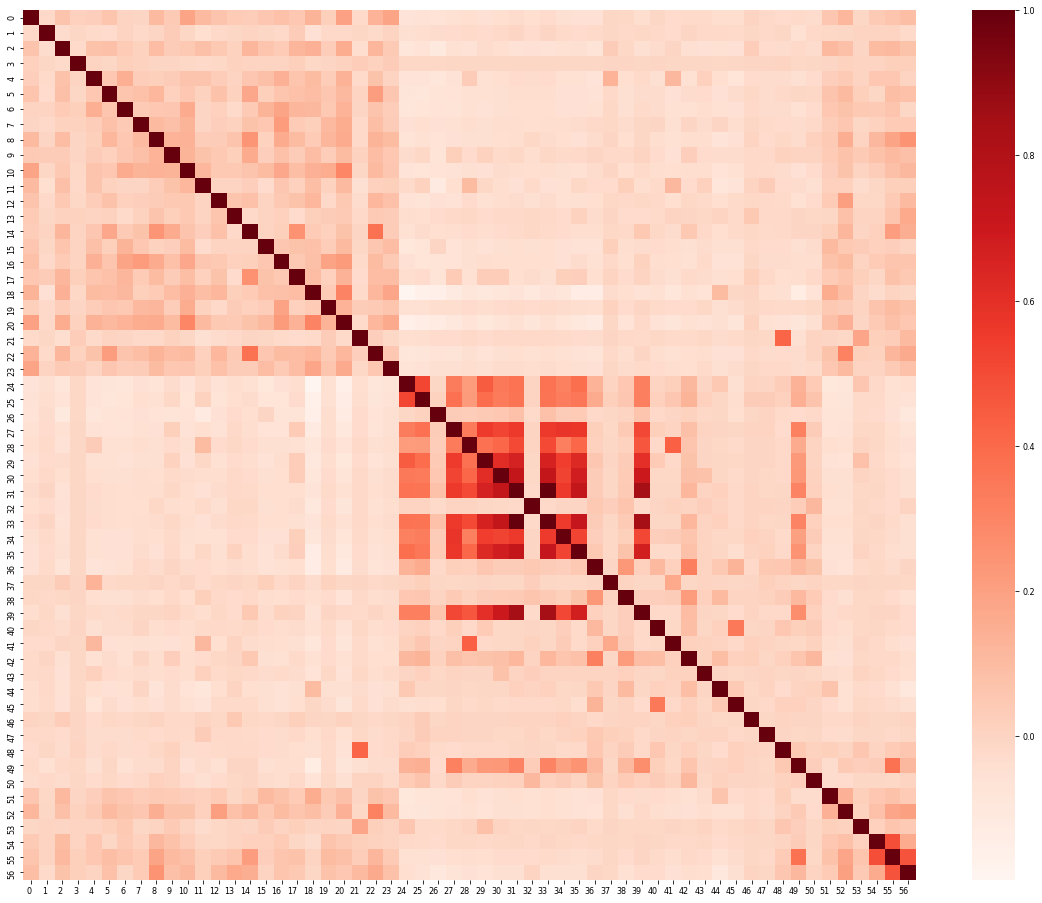

In [28]:
# Using numpy software.  Another comand in PANDAS (see latter)
corr = np.corrcoef(df_np[:, :-1].T)
print(corr.shape)

plt.figure(figsize=(20,16))

ax = sns.heatmap(corr, cmap=plt.cm.Reds)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right'
);
plt.show()

## 1.4. Split dataset in Training Set and Test Set

In [29]:
X = df_np[:,:57]

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

## 1.5. Feature Selection
We will perform feature selection based on the F-score value
### 1.5.1. F-score calculation

In [31]:
# Possible packages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

# EXAMPLE
### ANOVA..... f_classif option
from sklearn.feature_selection import SelectKBest, f_classif

#N=reduced_dataset.shape[1]
N=57

k_bestfeatures = SelectKBest(score_func = f_classif)
rankings = k_bestfeatures.fit(X_train,y_train)
b=list(rankings.scores_)
a=list(range(0,len(b)))

sf = [g for _,g in sorted(zip(b,a))]
sf=sf[len(a)-N:len(a)]
c=1
sf=reversed(sf)
print(['order','index','f-score'])
inx=[]
for chosen in sf:
    print(str(c)+'º: ', chosen,'   ', b[chosen])
    c+=1
    inx.append(chosen)
print(inx)

['order', 'index', 'f-score']
1º:  20     542.0823179209015
2º:  6     399.2966634379231
3º:  22     364.74419292753544
4º:  52     337.94221784846405
5º:  55     326.50267796279337
6º:  18     258.2581419242705
7º:  15     244.28314391851367
8º:  16     235.02448826090958
9º:  24     227.64404794233707
10º:  25     196.4159671018112
11º:  56     193.32955210059535
12º:  10     186.0071245023645
13º:  8     176.76377007281565
14º:  23     172.63812614127008
15º:  51     155.80975898615802
16º:  4     147.3207126378926
17º:  7     140.76394568423163
18º:  5     138.22743286376956
19º:  19     122.45351062822614
20º:  36     112.6824703531532
21º:  26     107.60413192136406
22º:  29     104.44020430579118
23º:  14     99.65804569834665
24º:  2     98.64345291185224
25º:  17     98.39331863368328
26º:  27     91.34114013398312
27º:  9     74.76439361543069
28º:  44     70.80308209868967
29º:  34     70.00749427037356
30º:  45     68.6050325694161
31º:  28     66.98997949548384
32º:  41   

### 1.5.2. Pearsons correlation matrix - Reduction of features
After calculating the F-score we will remove one feature of the pairs of features that are very correlated. For that we will use the pearsons correlation matrix. The feature of the pair that is removed is the one that has a lower value of F-score. 
The threshold value we use to determine if a pair of features if correlated is 0.8.

In [32]:
data_features = pd.DataFrame(X, dtype='float')

corr_matrix = data_features.corr().abs()

def remove_features(X_train, X_test, corr, threshold=0.8):
    # Select upper triangle of correlation matrix
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    to_drop = []
    for column in upper.columns:
        other_column = 0
        for correlation_value in upper[column]:
            if correlation_value > threshold:
                if inx.index(column) > inx.index(upper.columns[other_column] and other_column not in to_drop):
                    inx.remove(column)
                    to_drop.append(upper.columns[other_column])
                else:
                    inx.remove(column)
                    to_drop.append(column)
                break
            other_column += 1
    print("Removed features: ", to_drop)
    return X_train.drop(X_train[to_drop], axis=1), X_test.drop(X_test[to_drop], axis=1)

X_train, X_test = remove_features(pd.DataFrame(X_train, dtype='float'), pd.DataFrame(X_test, dtype='float'), corr_matrix)
print(X_train.head())

Removed features:  [33, 39]
     0     1     2    3     4     5     6     7     8     9   ...   47     48  \
0  0.27  0.27  0.55  0.0  0.27  0.27  0.00  1.37  0.27  0.82  ...  0.0  0.000   
1  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0  0.000   
2  0.00  0.00  0.00  0.0  0.00  0.00  0.45  0.00  0.00  0.45  ...  0.0  0.000   
3  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0  0.253   
4  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0  0.000   

      49   50     51     52     53      54     55      56  
0  0.280  0.0  1.029  0.093  0.000   3.621   63.0   344.0  
1  0.000  0.0  0.000  0.000  0.000   2.000    3.0     4.0  
2  0.000  0.0  0.037  0.150  1.584  13.936  114.0  1324.0  
3  1.518  0.0  0.506  0.000  0.000   2.047    6.0    43.0  
4  0.000  0.0  0.000  0.000  0.000   1.000    1.0     5.0  

[5 rows x 55 columns]


## 1.6. Feature Scaling
### 1.6.1. Normalization z-score
Now we normalize all the dataset using the z-score normalization.

In [8]:
for column in X_train:
    feature_data = X_train.loc[:, column]
    X_train.loc[:, column] = ( feature_data - X_train.describe()[column]["mean"] ) / X_train.describe()[column]["std"]

for column in X_test:
    feature_data = X_test.loc[:, column]
    X_test.loc[:, column] = ( feature_data - X_test.describe()[column]["mean"] ) / X_test.describe()[column]["std"]

#scaler = StandardScaler()

#scaled_features = scaler.fit_transform(X_train.values)
#X_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)

#scaled_features = scaler.fit_transform(X_test.values)
#X_test = pd.DataFrame(scaled_features, index=X_test.index, columns=X_test.columns)

# 2. Train Model

In the section we will now train our models to study which parameters are better for each one. 
We will study the following classifiers:
 - SVM
 - Random Forest
 - Logistic Regression

## 2.1. SVM 

num features =  5

Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 1.00    1.00    85.01      0.90       0.82        0.83       0.82        0.69          0.95     
 1.00    5.00    85.08      0.89       0.82        0.83       0.82        0.70          0.95     
 1.00    8.00    85.08      0.89       0.82        0.83       0.82        0.70          0.95     
 1.00   10.00    85.01      0.89       0.82        0.83       0.82        0.70          0.95     
 1.00   20.00    85.01      0.89       0.82        0.83       0.82        0.70          0.95     
 1.00   50.00    85.01      0.89       0.82        0.83       0.82        0.70          0.95     

Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 2.00    1.00    77.62      0.93       0.72        0.73       0.72        0.45          0.98     
 2.00    5.00    77.91      0.93       0.72        0.73       0.72        0.47          0.98     


 3.00   50.00    90.01      0.94       0.88        0.89       0.88        0.80          0.97     
num features =  25

Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 1.00    1.00    90.88      0.92       0.90        0.90       0.90        0.84          0.95     
 1.00    5.00    91.24      0.92       0.90        0.91       0.90        0.85          0.95     
 1.00    8.00    91.02      0.92       0.90        0.90       0.90        0.85          0.95     
 1.00   10.00    91.31      0.91       0.90        0.91       0.90        0.86          0.95     
 1.00   20.00    91.02      0.91       0.90        0.90       0.90        0.85          0.95     
 1.00   50.00    91.09      0.91       0.90        0.90       0.90        0.85          0.95     

Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 2.00    1.00    84.36      0.93       0.81        0.82       0.81        0.64          0.97     

 3.00   20.00    89.36      0.93       0.87        0.88       0.87        0.79          0.96     
 3.00   50.00    90.44      0.93       0.89        0.90       0.89        0.82          0.96     
num features =  45

Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 1.00    1.00    92.32      0.92       0.92        0.92       0.92        0.88          0.95     
 1.00    5.00    92.47      0.92       0.92        0.92       0.92        0.88          0.95     
 1.00    8.00    92.32      0.92       0.92        0.92       0.92        0.88          0.95     
 1.00   10.00    92.32      0.92       0.92        0.92       0.92        0.88          0.95     
 1.00   20.00    92.11      0.91       0.91        0.92       0.91        0.88          0.95     
 1.00   50.00    92.18      0.91       0.91        0.92       0.91        0.88          0.95     

Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 

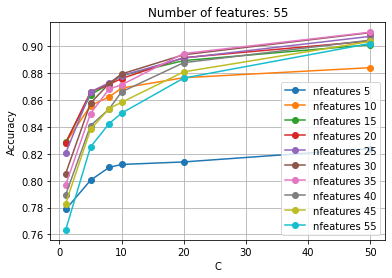

In [9]:
C_rgl = [1, 5, 8, 10, 20, 50]
degrees = [1, 2, 3]
num_features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 55]

for f in num_features:
    X_train_new = X_train.loc[:, inx[:f]]
    X_test_new = X_test.loc[:, inx[:f]]
    
    print("num features = ", f)
    for degree in degrees:
        print("")
        accuracies = []
        print("{:^7s} {:^6s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("Degree", "C", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
        for i in C_rgl:
            clf = SVC(kernel='poly', C=i, degree=degree)
            scores = cross_val_score(clf, X_train_new, y_train, cv=4, scoring="accuracy")
            if degree == 3:
                accuracies.append(scores.mean())
            
            clf = SVC(kernel='poly', C=i, degree=degree)
            clf.fit(X_train_new, y_train)
            y_predict = clf.predict(X_test_new)
            statistics = precision_recall_fscore_support(y_test, y_predict)
            
            accuracy = accuracy_score(y_test, y_predict)*100
            precision = precision_score(y_test, y_predict)
            recall = (statistics[1][0] + statistics[1][1]) / 2
            f1score = (statistics[2][0] + statistics[2][1]) / 2
            roc_area = roc_auc_score(y_test, y_predict)
            sensitivity = statistics[1][1]
            specificity = statistics[1][0]
            
            print("{:^7.2f} {:^6.2f} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
            .format(degree, i, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))
            
    
    plt.plot(C_rgl, accuracies, marker="o" ,label=f"nfeatures {f}")
plt.legend()
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title(f"Number of features: {str(f)}") 
plt.grid()
plt.show()
     


num features =  5

Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 1.00    1.00    84.65      0.92       0.82        0.83       0.82        0.69          0.96     
 1.00    5.00    84.79      0.92       0.82        0.84       0.82        0.69          0.96     
 1.00    8.00    84.79      0.92       0.82        0.84       0.82        0.69          0.96     
 1.00   10.00    84.87      0.92       0.83        0.84       0.83        0.69          0.96     
 1.00   20.00    84.87      0.92       0.83        0.84       0.83        0.69          0.96     
 1.00   50.00    84.87      0.92       0.83        0.84       0.83        0.69          0.96     

Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 2.00    1.00    78.20      0.95       0.74        0.75       0.74        0.50          0.98     
 2.00    5.00    79.00      0.95       0.75        0.76       0.75        0.52          0.98     


 3.00   50.00    89.28      0.95       0.88        0.89       0.88        0.78          0.97     
num features =  25

Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 1.00    1.00    89.72      0.93       0.88        0.89       0.88        0.81          0.96     
 1.00    5.00    89.57      0.93       0.88        0.89       0.88        0.81          0.96     
 1.00    8.00    89.57      0.93       0.88        0.89       0.88        0.81          0.96     
 1.00   10.00    89.79      0.93       0.89        0.89       0.89        0.82          0.96     
 1.00   20.00    90.08      0.94       0.89        0.90       0.89        0.81          0.96     
 1.00   50.00    90.22      0.94       0.89        0.90       0.89        0.82          0.96     

Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 2.00    1.00    82.04      0.93       0.79        0.80       0.79        0.61          0.97     

 3.00   20.00    88.49      0.93       0.87        0.88       0.87        0.78          0.96     
 3.00   50.00    89.93      0.93       0.89        0.89       0.89        0.82          0.96     
num features =  45

Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 1.00    1.00    90.73      0.92       0.90        0.90       0.90        0.85          0.95     
 1.00    5.00    91.17      0.92       0.90        0.91       0.90        0.86          0.95     
 1.00    8.00    91.38      0.92       0.91        0.91       0.91        0.87          0.95     
 1.00   10.00    91.67      0.92       0.91        0.91       0.91        0.87          0.95     
 1.00   20.00    91.82      0.93       0.91        0.91       0.91        0.87          0.95     
 1.00   50.00    92.32      0.93       0.92        0.92       0.92        0.88          0.96     

Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 

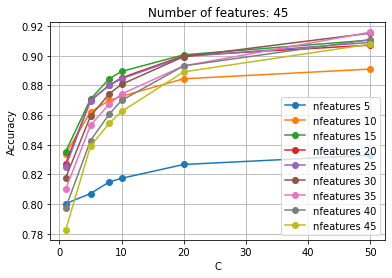

## 2.2. Random Forest

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         81.68      0.78       0.80        0.80       0.80        0.73          0.87     
     10        84.72      0.85       0.83        0.83       0.83        0.74          0.92     
    100        86.10      0.87       0.84        0.85       0.84        0.75          0.93     
    500        86.17      0.87       0.84        0.85       0.84        0.76          0.93     
    1000       86.24      0.87       0.84        0.85       0.84        0.76          0.93     
    2000       86.46      0.88       0.85        0.85       0.85        0.76          0.93     


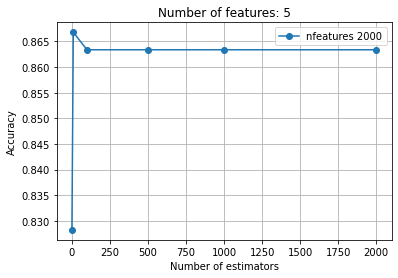

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         86.31      0.82       0.86        0.86       0.86        0.83          0.89     
     10        90.37      0.90       0.89        0.90       0.89        0.84          0.94     
    100        90.30      0.89       0.89        0.90       0.89        0.86          0.93     
    500        90.44      0.89       0.90        0.90       0.90        0.85          0.94     
    1000       90.51      0.89       0.90        0.90       0.90        0.86          0.93     
    2000       90.51      0.89       0.90        0.90       0.90        0.86          0.93     


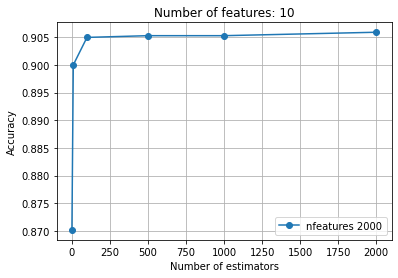

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         84.87      0.85       0.83        0.84       0.83        0.74          0.92     
     10        89.72      0.92       0.88        0.89       0.88        0.81          0.96     
    100        90.80      0.93       0.89        0.90       0.89        0.83          0.96     
    500        91.24      0.93       0.90        0.91       0.90        0.83          0.96     
    1000       91.17      0.93       0.90        0.90       0.90        0.83          0.96     
    2000       91.24      0.93       0.90        0.91       0.90        0.83          0.96     


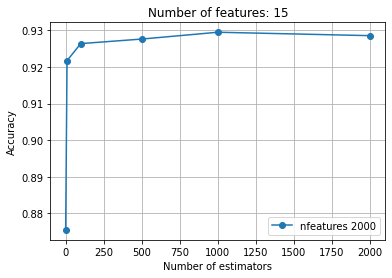

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         85.59      0.85       0.84        0.84       0.84        0.76          0.92     
     10        89.79      0.94       0.88        0.89       0.88        0.79          0.97     
    100        91.02      0.95       0.89        0.90       0.89        0.81          0.97     
    500        91.09      0.95       0.89        0.90       0.89        0.82          0.97     
    1000       91.09      0.94       0.89        0.90       0.89        0.82          0.97     
    2000       90.80      0.94       0.89        0.90       0.89        0.81          0.97     


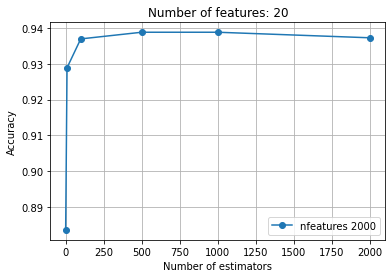

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         81.54      0.77       0.80        0.80       0.80        0.74          0.86     
     10        89.36      0.95       0.87        0.88       0.87        0.76          0.98     
    100        91.02      0.96       0.89        0.90       0.89        0.80          0.98     
    500        91.24      0.95       0.89        0.90       0.89        0.81          0.97     
    1000       91.24      0.95       0.89        0.90       0.89        0.81          0.98     
    2000       91.38      0.95       0.90        0.91       0.90        0.82          0.98     


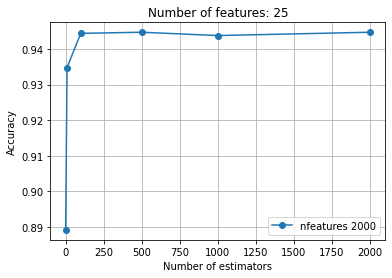

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         84.65      0.81       0.84        0.84       0.84        0.79          0.88     
     10        88.92      0.95       0.86        0.88       0.86        0.75          0.98     
    100        91.46      0.96       0.90        0.91       0.90        0.81          0.98     
    500        92.11      0.96       0.90        0.91       0.90        0.83          0.98     
    1000       92.11      0.96       0.90        0.91       0.90        0.83          0.98     
    2000       92.11      0.96       0.90        0.91       0.90        0.83          0.98     


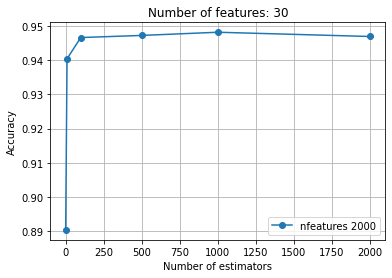

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         81.17      0.75       0.80        0.80       0.80        0.77          0.84     
     10        89.57      0.94       0.87        0.89       0.87        0.78          0.97     
    100        91.46      0.96       0.90        0.91       0.90        0.81          0.98     
    500        92.03      0.96       0.90        0.91       0.90        0.83          0.98     
    1000       92.25      0.96       0.91        0.92       0.91        0.83          0.98     
    2000       92.40      0.96       0.91        0.92       0.91        0.84          0.98     


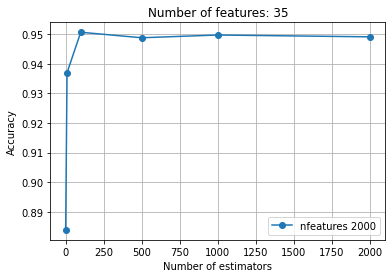

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         85.52      0.85       0.84        0.84       0.84        0.77          0.91     
     10        89.50      0.94       0.87        0.89       0.87        0.78          0.97     
    100        92.11      0.97       0.90        0.91       0.90        0.82          0.98     
    500        92.03      0.96       0.90        0.91       0.90        0.83          0.98     
    1000       92.11      0.96       0.91        0.91       0.91        0.83          0.98     
    2000       92.40      0.96       0.91        0.92       0.91        0.84          0.98     


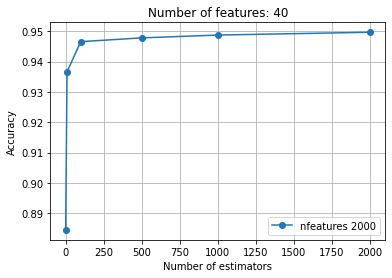

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         87.83      0.87       0.87        0.87       0.87        0.81          0.92     
     10        90.37      0.96       0.88        0.89       0.88        0.78          0.98     
    100        92.69      0.96       0.91        0.92       0.91        0.85          0.98     
    500        92.83      0.96       0.91        0.92       0.91        0.85          0.98     
    1000       92.54      0.95       0.91        0.92       0.91        0.85          0.97     
    2000       92.61      0.95       0.91        0.92       0.91        0.85          0.97     


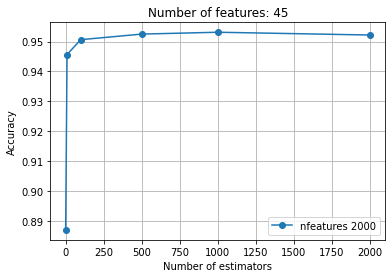

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         81.46      0.83       0.78        0.79       0.78        0.65          0.92     
     10        89.28      0.95       0.87        0.88       0.87        0.76          0.97     
    100        92.40      0.95       0.91        0.92       0.91        0.84          0.97     
    500        92.54      0.96       0.91        0.92       0.91        0.84          0.98     
    1000       92.54      0.96       0.91        0.92       0.91        0.84          0.98     
    2000       92.47      0.96       0.91        0.92       0.91        0.84          0.98     


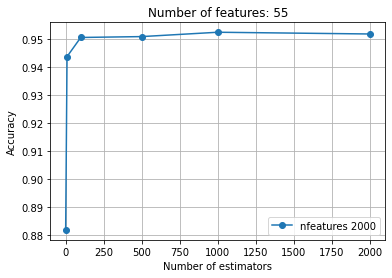

In [10]:
number_of_estimators = [1, 10, 100, 500, 1000, 2000]
num_features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 55]

for f in num_features:
    X_train_new = X_train.loc[:, inx[:f]]
    X_test_new = X_test.loc[:, inx[:f]]
    accuracies = []
    print("{:^12s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("nEstimators", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
    for i in number_of_estimators:
        clf = RandomForestClassifier(n_estimators = i, random_state = 1) 
        
        scores = cross_val_score(clf, X_train_new, y_train, cv=4, scoring="accuracy")
        accuracies.append(scores.mean())
        
        clf = RandomForestClassifier(n_estimators = i, random_state = 1) 
        clf.fit(X_train_new, y_train)
        
        y_predict = clf.predict(X_test_new)
        statistics = precision_recall_fscore_support(y_test, y_predict)
            
        accuracy = accuracy_score(y_test, y_predict)*100
        precision = precision_score(y_test, y_predict)
        recall = (statistics[1][0] + statistics[1][1]) / 2
        f1score = (statistics[2][0] + statistics[2][1]) / 2
        roc_area = roc_auc_score(y_test, y_predict)
        sensitivity = statistics[1][1]
        specificity = statistics[1][0]
        
        print("{:^12d} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
            .format(i, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))
            
        
    plt.plot(number_of_estimators, accuracies, marker="o" ,label=f"nfeatures {i}")
    
    plt.legend()
    plt.xlabel("Number of estimators")
    plt.ylabel("Accuracy")
    plt.title(f"Number of features: {str(f)}") 
    plt.grid()
    plt.show()

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         84.07      0.87       0.82        0.83       0.82        0.73          0.92     
     10        85.59      0.87       0.84        0.85       0.84        0.77          0.92     
    100        85.95      0.87       0.85        0.85       0.85        0.78          0.92     
    500        85.88      0.87       0.85        0.85       0.85        0.77          0.92     
    1000       86.02      0.87       0.85        0.85       0.85        0.78          0.92     
    2000       86.17      0.88       0.85        0.85       0.85        0.78          0.92     


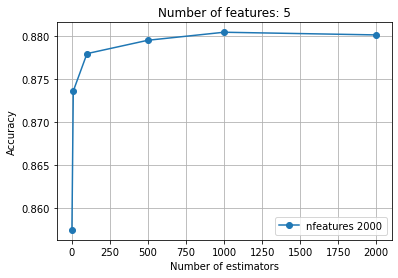

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         84.14      0.84       0.83        0.83       0.83        0.76          0.90     
     10        88.63      0.88       0.88        0.88       0.88        0.84          0.92     
    100        88.99      0.87       0.89        0.89       0.89        0.86          0.91     
    500        88.92      0.87       0.89        0.89       0.89        0.87          0.91     
    1000       88.85      0.87       0.88        0.88       0.88        0.86          0.91     
    2000       88.92      0.87       0.89        0.89       0.89        0.87          0.91     


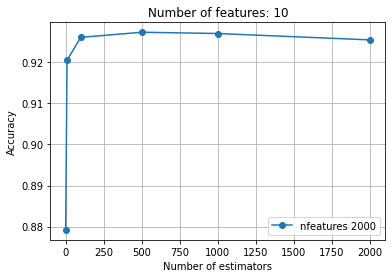

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         84.65      0.81       0.84        0.84       0.84        0.82          0.86     
     10        88.92      0.88       0.88        0.89       0.88        0.85          0.92     
    100        89.79      0.87       0.90        0.89       0.90        0.88          0.91     
    500        89.72      0.87       0.89        0.89       0.89        0.88          0.91     
    1000       90.01      0.88       0.90        0.90       0.90        0.88          0.91     
    2000       89.86      0.87       0.90        0.90       0.90        0.88          0.91     


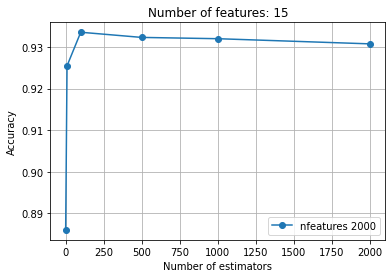

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         74.37      0.66       0.75        0.74       0.75        0.78          0.72     
     10        89.21      0.93       0.88        0.89       0.88        0.80          0.96     
    100        91.82      0.95       0.91        0.91       0.91        0.84          0.97     
    500        91.38      0.95       0.90        0.91       0.90        0.84          0.97     
    1000       91.53      0.95       0.90        0.91       0.90        0.84          0.97     
    2000       91.60      0.95       0.90        0.91       0.90        0.84          0.97     


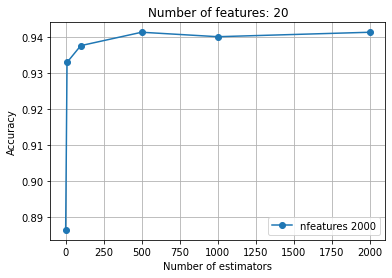

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         85.01      0.88       0.83        0.84       0.83        0.73          0.93     
     10        90.15      0.94       0.89        0.90       0.89        0.81          0.97     
    100        90.88      0.97       0.89        0.90       0.89        0.81          0.98     
    500        91.38      0.97       0.90        0.91       0.90        0.82          0.98     
    1000       91.31      0.97       0.90        0.91       0.90        0.82          0.98     
    2000       91.38      0.97       0.90        0.91       0.90        0.82          0.98     


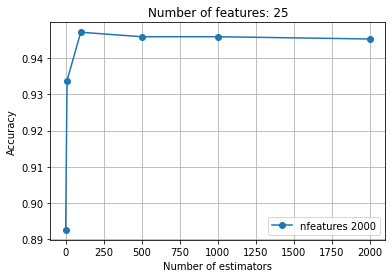

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         84.07      0.82       0.83        0.83       0.83        0.79          0.88     
     10        90.95      0.96       0.89        0.90       0.89        0.81          0.98     
    100        92.54      0.97       0.91        0.92       0.91        0.84          0.98     
    500        91.75      0.96       0.90        0.91       0.90        0.83          0.98     
    1000       91.96      0.97       0.91        0.92       0.91        0.83          0.98     
    2000       91.82      0.96       0.91        0.91       0.91        0.83          0.98     


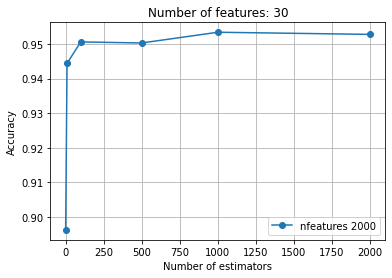

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         78.93      0.88       0.76        0.77       0.76        0.57          0.95     
     10        90.88      0.97       0.89        0.90       0.89        0.80          0.99     
    100        92.18      0.96       0.91        0.92       0.91        0.84          0.98     
    500        92.25      0.97       0.91        0.92       0.91        0.84          0.98     
    1000       92.03      0.97       0.91        0.92       0.91        0.84          0.98     
    2000       91.96      0.96       0.91        0.92       0.91        0.84          0.98     


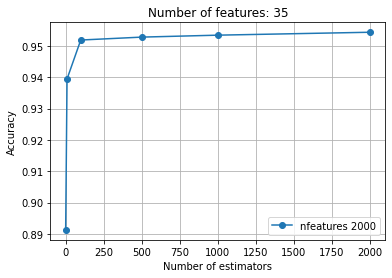

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         87.18      0.88       0.86        0.87       0.86        0.80          0.92     
     10        90.59      0.95       0.89        0.90       0.89        0.81          0.97     
    100        92.61      0.96       0.92        0.92       0.92        0.85          0.98     
    500        92.03      0.96       0.91        0.92       0.91        0.84          0.98     
    1000       92.11      0.96       0.91        0.92       0.91        0.84          0.98     
    2000       92.32      0.96       0.91        0.92       0.91        0.85          0.98     


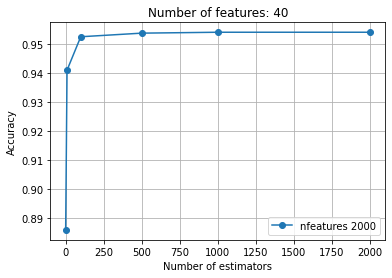

nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
     1         79.36      0.71       0.80        0.79       0.80        0.85          0.75     
     10        91.02      0.96       0.90        0.91       0.90        0.82          0.98     
    100        91.53      0.96       0.90        0.91       0.90        0.83          0.98     
    500        92.32      0.95       0.91        0.92       0.91        0.85          0.97     
    1000       92.25      0.97       0.91        0.92       0.91        0.84          0.98     
    2000       92.25      0.96       0.91        0.92       0.91        0.85          0.98     


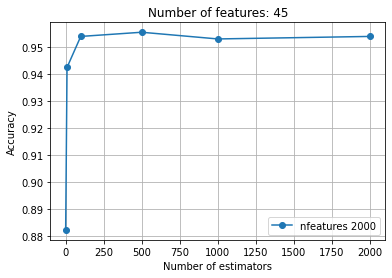

## 2.3. Logistic Regression

num features =  5

    C      Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
   0.00      78.57      0.90       0.73        0.75       0.73        0.50          0.96     
   0.01      81.61      0.87       0.78        0.79       0.78        0.62          0.94     
   1.00      84.21      0.88       0.81        0.82       0.81        0.68          0.94     
  10.00      84.14      0.88       0.81        0.82       0.81        0.68          0.94     
  100.00     84.14      0.88       0.81        0.82       0.81        0.68          0.94     
 1000.00     84.14      0.88       0.81        0.82       0.81        0.68          0.94     
num features =  10

    C      Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
   0.00      81.90      0.89       0.78        0.79       0.78        0.60          0.96     
   0.01      84.29      0.87       0.82        0.83       0.82        0.70          0.93     
   1.00      86.24   

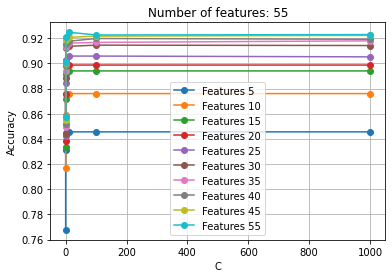

In [14]:
C_rgl = [0.001, 0.01, 1, 10, 100, 1000]
num_features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 55]

for f in num_features:
    X_train_new = X_train.loc[:, inx[:f]]
    X_test_new = X_test.loc[:, inx[:f]]
    
    print("num features = ", f)
    print("")
    accuracies = []
    print("{:^10s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("C", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
    for i in C_rgl:
        clf = LogisticRegression(C=i, max_iter=1000)
        scores = cross_val_score(clf, X_train_new, y_train, cv=4, scoring="accuracy")
        accuracies.append(scores.mean())

        clf = LogisticRegression(C=i, max_iter=1000)
        clf.fit(X_train_new, y_train)
        y_predict = clf.predict(X_test_new)
        statistics = precision_recall_fscore_support(y_test, y_predict)

        accuracy = accuracy_score(y_test, y_predict)*100
        precision = precision_score(y_test, y_predict)
        recall = (statistics[1][0] + statistics[1][1]) / 2
        f1score = (statistics[2][0] + statistics[2][1]) / 2
        roc_area = roc_auc_score(y_test, y_predict)
        sensitivity = statistics[1][1]
        specificity = statistics[1][0]

        print("{:^10.2f} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
            .format(i, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))
        
    plt.plot(C_rgl, accuracies, marker="o" ,label=f"Features {f}")
plt.legend()
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title(f"Number of features: {str(f)}") 
plt.grid()
plt.show()

# 3. Test Model
Analyzing the results obtained in the previous section, we will now choose the best parameters to test the performance of our models using the test set.

## 3.1. SVM

## 3.2. Random Forest

## 3.3 Logistic Regression

# 4. Test with Enron Dataset
In this section we will test our three classifiers using a diferent dataset.

## 4.1. Read the data

In [15]:
enron_df = pd.read_csv("Enron/enron_dataset.csv", header=None)

enron_y_test = enron_df[57]

In [12]:
X_train_new = X_train.loc[:, inx[:25]]
enron_X_test = enron_df.loc[:, inx[:25]]
print(enron_X_test)


        20   6    22     52    18   16   24  56    51   15  ...    2     5   \
0     0.00  0.0  0.0   0.00  0.00  0.0  0.0   0  0.00  0.0  ...  0.00  0.00   
1     1.85  0.0  0.0   0.00  4.54  0.0  0.0   0  0.09  0.0  ...  0.00  0.17   
2     3.37  0.0  0.0   0.00  1.12  0.0  0.0   0  0.00  0.0  ...  0.00  0.00   
3     0.00  0.0  0.0   0.00  0.00  0.0  0.0   0  0.00  0.0  ...  0.00  0.00   
4     0.00  0.0  0.0   0.00  4.35  0.0  0.0   0  0.00  0.0  ...  0.00  0.00   
...    ...  ...  ...    ...   ...  ...  ...  ..   ...  ...  ...   ...   ...   
1495  0.00  0.0  0.0  11.39  0.00  0.0  0.0   0  0.00  0.0  ...  1.29  0.00   
1496  0.00  0.0  0.0  11.39  0.00  0.0  0.0   0  0.00  0.0  ...  1.29  0.00   
1497  0.00  0.0  0.0  11.39  0.00  0.0  0.0   0  0.00  0.0  ...  1.29  0.00   
1498  0.00  0.0  0.0  11.39  0.00  0.0  0.0   0  0.00  0.0  ...  1.29  0.00   
1499  0.00  0.0  0.0  11.39  0.00  0.0  0.0   0  0.00  0.0  ...  1.29  0.00   

       7    23  55   17   14   36   26   29  
0    

In [13]:
enron_X_test

,20,6,22,52,18,16,24,56,51,15,...,2,5,7,23,55,17,14,36,26,29
0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0,0.00,0.0,...,0.00,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,1.85,0.0,0.0,0.00,4.54,0.0,0.0,0,0.09,0.0,...,0.00,0.17,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,3.37,0.0,0.0,0.00,1.12,0.0,0.0,0,0.00,0.0,...,0.00,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0,0.00,0.0,...,0.00,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.0,0.0,0.00,4.35,0.0,0.0,0,0.00,0.0,...,0.00,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.00,0.0,0.0,11.39,0.00,0.0,0.0,0,0.00,0.0,...,1.29,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1496,0.00,0.0,0.0,11.39,0.00,0.0,0.0,0,0.00,0.0,...,1.29,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1497,0.00,0.0,0.0,11.39,0.00,0.0,0.0,0,0.00,0.0,...,1.29,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1498,0.00,0.0,0.0,11.39,0.00,0.0,0.0,0,0.00,0.0,...,1.29,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


## 4.2. SVM

In [16]:
# SVM
C_rgl = [1, 5, 8, 10, 20, 50]
degrees = [1, 2, 3]

num_features = [10,15,20,25,30,40, 55]

for n_feat in num_features:
    X_train_new = X_train.loc[:, inx[:n_feat]]
    enron_X_test = enron_df.loc[:, inx[:n_feat]]
    
    print("\nNumber of features: ", n_feat)
    for degree in degrees:
        print("{:^7s} {:^6s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("Degree", "C", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
        for c in C_rgl:
            clf = SVC(kernel='poly', C=c, degree=degree)
            clf.fit(X_train_new, y_train)
            y_predict = clf.predict(enron_X_test)

            statistics = precision_recall_fscore_support(enron_y_test, y_predict)

            accuracy = accuracy_score(enron_y_test, y_predict)*100
            precision = precision_score(enron_y_test, y_predict)
            recall = (statistics[1][0] + statistics[1][1]) / 2
            f1score = (statistics[2][0] + statistics[2][1]) / 2
            roc_area = roc_auc_score(enron_y_test, y_predict)
            sensitivity = statistics[1][1]
            specificity = statistics[1][0]

            print("{:^7.2f} {:^6.2f} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
                        .format(degree, c, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))


Number of features:  10
Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 1.00    1.00    68.60      0.69       0.50        0.41       0.50        1.00          0.00     
 1.00    5.00    68.27      0.75       0.61        0.61       0.61        0.80          0.42     
 1.00    8.00    68.33      0.78       0.64        0.64       0.64        0.75          0.54     
 1.00   10.00    67.67      0.79       0.65        0.64       0.65        0.73          0.56     
 1.00   20.00    67.00      0.79       0.65        0.64       0.65        0.71          0.59     
 1.00   50.00    67.20      0.80       0.66        0.64       0.66        0.70          0.61     
Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 2.00    1.00    46.00      0.86       0.58        0.45       0.58        0.26          0.90     
 2.00    5.00    47.27      0.84       0.58        0.47       0.58        0.29          0.88 

 3.00   50.00    58.67      0.89       0.67        0.59       0.67        0.45          0.88     

Number of features:  30
Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 1.00    1.00    72.20      0.79       0.66        0.67       0.66        0.82          0.51     
 1.00    5.00    70.47      0.83       0.70        0.68       0.70        0.72          0.67     
 1.00    8.00    69.40      0.84       0.70        0.67       0.70        0.68          0.72     
 1.00   10.00    68.67      0.85       0.70        0.67       0.70        0.66          0.74     
 1.00   20.00    66.47      0.87       0.70        0.66       0.70        0.60          0.80     
 1.00   50.00    58.47      0.89       0.66        0.58       0.66        0.45          0.88     
Degree    C    Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
 2.00    1.00    45.80      0.86       0.58        0.45       0.58        0.25          0.91 

## 4.3. Random Forest

In [17]:
# Random Forest
number_of_estimators = [100, 150, 250, 500, 1000, 2000]

num_features = [10,15,20,25,30,40, 55]

for n_feat in num_features:
    X_train_new = X_train.loc[:, inx[:n_feat]]
    enron_X_test = enron_df.loc[:, inx[:n_feat]]
    
    print("\nNumber of features: ", n_feat)
    print("{:^12s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("nEstimators", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
    for number in number_of_estimators:
        clf = RandomForestClassifier(n_estimators = number, random_state = 1) 
        clf.fit(X_train_new, y_train)

        y_predict = clf.predict(enron_X_test)
        
        statistics = precision_recall_fscore_support(enron_y_test, y_predict)

        accuracy = accuracy_score(enron_y_test, y_predict)*100
        precision = precision_score(enron_y_test, y_predict)
        recall = (statistics[1][0] + statistics[1][1]) / 2
        f1score = (statistics[2][0] + statistics[2][1]) / 2
        roc_area = roc_auc_score(enron_y_test, y_predict)
        sensitivity = statistics[1][1]
        specificity = statistics[1][0]

        print("{:^12d} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
                    .format(number, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))
        


Number of features:  10
nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
    100        68.60      0.69       0.50        0.41       0.50        1.00          0.00     
    150        65.47      0.74       0.59        0.59       0.59        0.77          0.40     
    250        65.33      0.74       0.58        0.59       0.58        0.77          0.40     
    500        68.60      0.69       0.50        0.41       0.50        1.00          0.00     
    1000       68.67      0.69       0.50        0.41       0.50        1.00          0.00     
    2000       68.60      0.69       0.50        0.41       0.50        1.00          0.00     

Number of features:  15
nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
    100        68.67      0.69       0.50        0.41       0.50        1.00          0.00     
    150        68.67      0.69       0.50        0.41       0.50        1.00          

/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    100        31.20      0.00       0.50        0.24       0.50        0.00          1.00     


/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    150        31.20      0.00       0.50        0.24       0.50        0.00          1.00     


/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    250        31.20      0.00       0.50        0.24       0.50        0.00          1.00     


/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    500        31.20      0.00       0.50        0.24       0.50        0.00          1.00     


/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    1000       31.20      0.00       0.50        0.24       0.50        0.00          1.00     


/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    2000       31.20      0.00       0.50        0.24       0.50        0.00          1.00     

Number of features:  40
nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
    100        32.13      0.94       0.51        0.25       0.51        0.01          1.00     
    150        34.93      0.98       0.53        0.30       0.53        0.06          1.00     
    250        32.80      0.96       0.51        0.26       0.51        0.02          1.00     
    500        32.13      0.94       0.51        0.25       0.51        0.01          1.00     


/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    1000       31.20      0.00       0.50        0.24       0.50        0.00          1.00     


/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/rafael/LinuxDisk/Programas/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


    2000       31.20      0.00       0.50        0.24       0.50        0.00          1.00     

Number of features:  55
nEstimators  Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
    100        33.20      1.00       0.51        0.27       0.51        0.03          1.00     
    150        32.47      1.00       0.51        0.26       0.51        0.02          1.00     
    250        31.67      1.00       0.50        0.25       0.50        0.01          1.00     
    500        31.80      1.00       0.50        0.25       0.50        0.01          1.00     
    1000       31.33      1.00       0.50        0.24       0.50        0.00          1.00     
    2000       31.33      1.00       0.50        0.24       0.50        0.00          1.00     


## 4.4. Logistic Regression

In [18]:
# Logistic Regression
C_rgl = [0.01, 1, 10, 100, 1000]

num_features = [10,15,20,25,30,40,55]

for n_feat in num_features:
    X_train_new = X_train.loc[:, inx[:n_feat]]
    enron_X_test = enron_df.loc[:, inx[:n_feat]]
    
    print("\nNumber of features: ", n_feat)
    print("{:^10s} {:^9s} {:^11s} {:^9s} {:^12s} {:^9s} {:^13s} {:^13s}".format("C", "Accuracy", "Precision", "Recall", "F-measure", "Roc area", "Sensitivity", "Specificity"))
    for c in C_rgl:
        clf = LogisticRegression(C=c, max_iter=1000)
        clf.fit(X_train_new, y_train)
        y_predict = clf.predict(enron_X_test)
        statistics = precision_recall_fscore_support(enron_y_test, y_predict)

        accuracy = accuracy_score(enron_y_test, y_predict)*100
        precision = precision_score(enron_y_test, y_predict)
        recall = (statistics[1][0] + statistics[1][1]) / 2
        f1score = (statistics[2][0] + statistics[2][1]) / 2
        roc_area = roc_auc_score(enron_y_test, y_predict)
        sensitivity = statistics[1][1]
        specificity = statistics[1][0]
        print("{:^10.2f} {:^9.2f} {:^11.2f} {:^9.2f} {:^12.2f} {:^9.2f} {:^13.2f} {:^13.2f}"
            .format(c, round(accuracy, 2), round(precision, 2), round(recall, 2), round(f1score, 2), round(roc_area, 2), round(sensitivity, 2), round(specificity, 2) ))



Number of features:  10
    C      Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
   0.01      65.07      0.73       0.58        0.58       0.58        0.77          0.38     
   1.00      66.87      0.76       0.61        0.61       0.61        0.76          0.46     
  10.00      67.07      0.77       0.63        0.62       0.63        0.75          0.50     
  100.00     67.13      0.77       0.63        0.63       0.63        0.74          0.52     
 1000.00     67.13      0.77       0.63        0.63       0.63        0.74          0.52     

Number of features:  15
    C      Accuracy   Precision   Recall    F-measure   Roc area   Sensitivity   Specificity 
   0.01      69.80      0.76       0.62        0.63       0.62        0.82          0.42     
   1.00      71.33      0.78       0.66        0.66       0.66        0.81          0.51     
  10.00      71.60      0.79       0.67        0.67       0.67        0.80          0.53     
  100.00  